**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Carlos Alberto Rocha Chávez
*   MATRÍCULA: A01796914


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [26]:
import pandas as pd

air_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Ciencia y Analítica de Datos/Actividad 2/LaqnData.csv')

* `shape`: Describe la estructura del dataframe (filas, columnas)

In [27]:
air_df.shape

(43800, 6)

* `columns`: Otorga el nombre de las columnas del dataframe



In [28]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

* `head`: Devuelve los primeros registros del dataframe

In [29]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


* `tail`: Devuelve los últimos registros del dataframe


In [30]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


* `dtypes`: Indica el tipo de dato que contiene cada columna

In [31]:
air_df.dtypes

,0
Site,object
Species,object
ReadingDateTime,object
Value,float64
Units,object
Provisional or Ratified,object


*   Calcula el porcentaje de valores faltantes por columna.



In [32]:
air_df.isna().sum() * 100 / len(air_df)

,0
Site,0.000000
Species,0.000000
ReadingDateTime,0.000000
Value,7.374429
Units,0.000000
Provisional or Ratified,0.000000


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

* Valores únicos por columna

In [33]:
air_df.nunique()

,0
Site,1
Species,5
ReadingDateTime,8760
Value,1847
Units,3
Provisional or Ratified,1


*   ¿Cuántas mediciones se hicieron?

In [34]:
n_mediciones = air_df['ReadingDateTime'].nunique()

print(f'Se hicieron {n_mediciones} mediciones.')

Se hicieron 8760 mediciones.


[*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

In [35]:
n_contaminantes = air_df['Species'].nunique()
t_contaminantes = air_df['Species'].unique()

print(f'Se analizaron {n_contaminantes} contaminantes del aire: {t_contaminantes}')

Se analizaron 5 contaminantes del aire: ['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']


*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

In [36]:
columnas_sin_valor = air_df.columns[air_df.nunique() == 1]

print(f'Las columnas sin valor informativo son: {columnas_sin_valor.values}')

#Elimínalas del dataframe
air_df = air_df.drop(columns=['Site','Provisional or Ratified'])

Las columnas sin valor informativo son: ['Site' 'Provisional or Ratified']


*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.


In [37]:
t_units = air_df['Units'].unique()
print(f'Los valores de la columna "Units" son: {t_units}')

#Elimínala del dataframe
air_df = air_df.drop(columns=['Units'])

Los valores de la columna "Units" son: ['ug m-3' 'ug m-3 as NO2' 'ug/m3']


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

* Conteo de valores por categoría de contaminantes.

In [38]:
air_df['Species'].value_counts()

,count
Species,
NO,8760
NO2,8760
NOX,8760
PM10,8760
PM2.5,8760


* Determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [39]:
conteo_species = air_df['Species'].value_counts()
total_mediciones = len(air_df)
es_coincidencia = conteo_species.sum() == total_mediciones

if es_coincidencia == True:
    print("Las lecturas de cada contaminante coinciden con el total de mediciones.")
else:
    print("Las lecturas de cada contaminante NO coinciden con el total de mediciones.")

Las lecturas de cada contaminante coinciden con el total de mediciones.


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [40]:
air_df.groupby('Species')['Value'].mean()

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [41]:
pvt_df = air_df.pivot(index= 'ReadingDateTime', columns= 'Species', values= 'Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [42]:
pvt_df.describe()

Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

In [43]:
max_NO2 = pvt_df['NO2'].max()
fecha_max_NO2 = pvt_df.loc[pvt_df['NO2'] == max_NO2].index[0]

print(f'El mayor valor de NO2 registrado es de {max_NO2}, y pertenece al día {fecha_max_NO2}.')

El mayor valor de NO2 registrado es de 120.2, y pertenece al día 24/01/2017 19:00.


*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?


In [44]:
min_PM10 = pvt_df['PM10'].min()
fecha_min_PM10 = pvt_df.loc[pvt_df['PM10'] == min_PM10].index[0]

print(f'El menor valor de PM10 registrado es de {min_PM10}, y pertenece al día {fecha_min_PM10}.')

El menor valor de PM10 registrado es de -5.6, y pertenece al día 12/09/2017 23:00.


* ¿Cuál es la mediana del NO? ¿Cómo se interpreta?

In [45]:
mediana_NO = pvt_df['NO'].median()

print(f'La mediana del NO es de {mediana_NO}.')

La mediana del NO es de 7.1.


Esto quiere decir que una medición de 7.1 es el punto medio de nuestros datos, es decir, al ordenar todas las mediciones de NO de menor a mayor, este resultado se encuentra en el centro. Esto nos ayuda a tener una idea de la tendencia central de nuestros datos.

*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [46]:
primer_cuartil_PM25 = pvt_df['PM2.5'].quantile(0.25)

print(f'El primer cuartil de PM2.5 es de {primer_cuartil_PM25}.')

El primer cuartil de PM2.5 es de 7.0.


Este dato nos indica que el 25% de nuestros datos de medición de PM2.5 tiene un resultado de 7.0 o un resultado menor a este. Esto nos ayuda a visualizar el nivel de distribución que tienen nuestros datos.

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

array([[<Axes: title={'center': 'NO'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

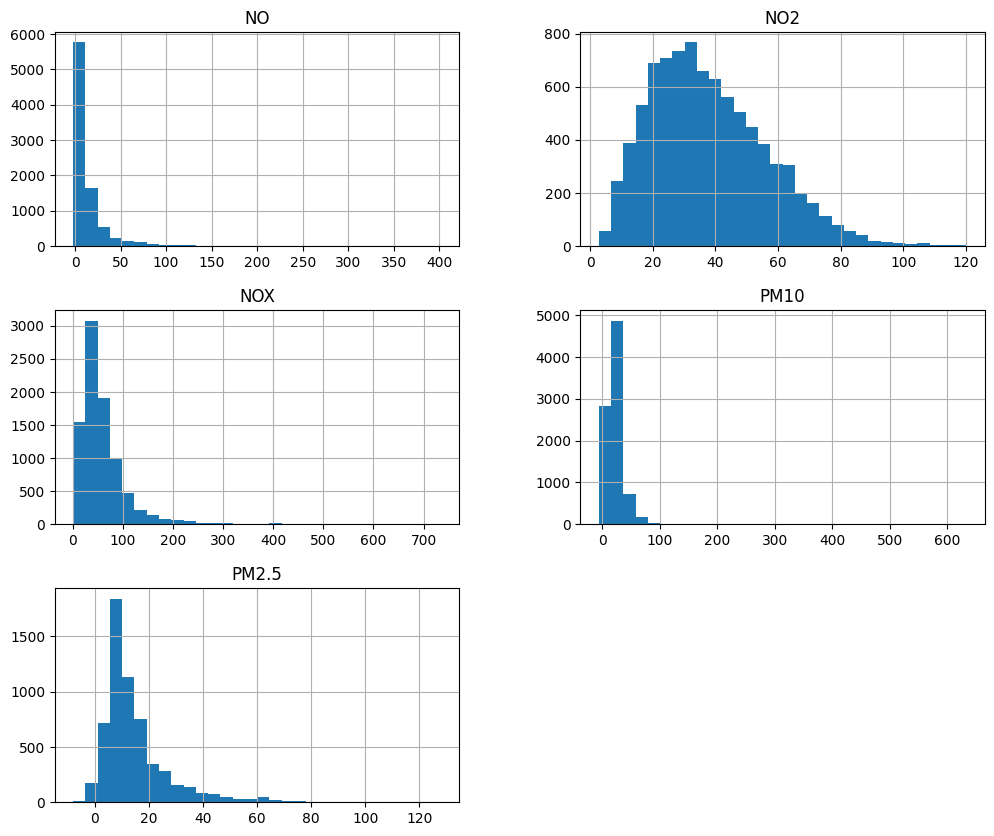

In [47]:
pvt_df.hist(figsize=(12,10),bins=(30))

El contaminante NO2 muestra una mayor variabilidad en comparación con los otros contaminantes.

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [48]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

El código utilizado transforma el dataframe de la siguiente forma:
```
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
```
Esta primer línea de código toma las fechas de medición de la columna "ReadingDateTime" y las divide entre la fecha y la hora en base al espacio '   ' que los separa. El resultado se asigna al dataframe "datetime_df".
```
datetime_df.columns = ['Date','Time']
```
Esta línea asigna un nombre a las columnas creadas por la división de la fecha y hora.
```
datetime_df
```
Esta línea llama al dataframe creado.
```
date_df = datetime_df.Date.str.split('/',expand=True)
```
Esta línea toma los valores de la columna "Date" de la variable previamente creada (datetime_df) y divide los valores en base al caracter "/", resultando en una división por día, mes y año.
```
date_df.columns = ['Day','Month','Year']
```
Esta línea asigna un nombre a las columnas creadas por la división de la fecha, nombrándolas "Day", "Month" y "Year".
```
date_df
```
Esta línea llama al nuevo dataframe creado.
```
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
```
Esta línea añade el dataframe "date_df" y la columna "time" del dataframe "datetime_df" a "air_df", para después eliminar las columnas de 'ReadingDateTime' y 'Year', ya que las columnas agregadas contienen la misma información que estas últimas, pero procesada de manera más detallada.
```
air_df = air_df.set_index(['Month','Day','Time','Species'])
```
Esta línea cambia el 'index' del dataframe a las columnas mencionadas.
```
air_df
```
Finalmente, esta línea muestra la nueva estructura de los datos.

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [49]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

No, al utilizar la función `.unstack()` se reestructuran los datos, pasando los valores del índice "Species" a columnas. Esta función nos permite cambiar la estructura del dataframe para un mejor análisis.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

**melt() / pivot():** El par de funciones `melt()` y `pivot()` son utilizadas para reestructurar el dataframe con el que se está trabajando, entre un formato de datos ancho y un formato de datos largo. La principal diferencia es que `melt()` cambia el dataframe de un formato ancho a un formato largo, mientras que `pivot()` hace lo contrario, cambiando de un formato largo a uno ancho. Una funge como la contraparte de la otra función.

**stack() / unstack():** El par de funciones `stack()` y `unstack()` son utilizadas específicamente para dataframes con índices multinivel, reestructurando la forma en que se presentan los datos. Su diferencia es que `stack()` convierte las columnas en filas, haciendo un dataframe más largo. Por su parte, `unstack()`, hace lo opuesto, convirtiendo las filas en columnas para compactar los datos en un formato más ancho.

Al tener que elegir una contraparte para la función `melt()`, optaría por la función `stack()`, ya que ambas trabajan hacia la misma dirección, ya que estas dos funciones tienen como finalidad comprimir la estructura de los datos en un formato largo.

